In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import cv2
import os

In [13]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(X_train)

60000

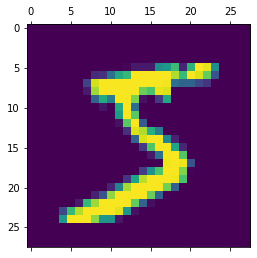

In [15]:
plt.matshow(X_train[0])

In [16]:
y_train[0]

5

In [17]:
X_train[0].shape

(28, 28)

In [18]:
X_train = X_train / 255
X_test = X_test / 255 

In [45]:
X_train.shape


(60000, 28,28)

In [27]:
model=keras.Sequential()
model.add(layers.Convolution2D(32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='sigmoid'))


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1292 - accuracy: 0.9603 - val_loss: 0.0458 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0404 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0283 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0481 -

In [29]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 4ms/step


In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

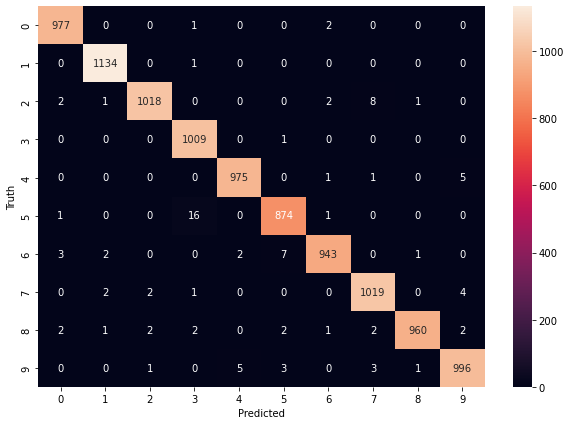

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
y0=model.predict(X_test)
y0[0]

313/313 [==============================] - 1s 4ms/step


array([3.2954129e-05, 1.9244287e-02, 2.1943058e-01, 5.2805140e-04,
       8.7845296e-02, 9.0276517e-05, 1.1336988e-07, 1.0000000e+00,
       2.0230151e-05, 1.0517129e-01], dtype=float32)

In [20]:

np.argmax(y0[1])

2

In [35]:
model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[3.29541290e-05, 1.92442872e-02, 2.19430581e-01, ...,
        1.00000000e+00, 2.02301508e-05, 1.05171293e-01],
       [6.09244645e-01, 8.96554410e-01, 1.00000000e+00, ...,
        3.81612017e-06, 1.87462327e-04, 4.69800483e-08],
       [4.73889449e-05, 9.99999940e-01, 9.53151612e-05, ...,
        1.20870667e-02, 1.72488319e-04, 1.03991566e-04],
       ...,
       [1.92310621e-12, 1.81458086e-01, 5.87271359e-07, ...,
        8.91282165e-04, 4.92062271e-01, 9.81010079e-01],
       [7.46319629e-03, 5.42679918e-05, 1.49815617e-06, ...,
        2.81079498e-04, 9.99988556e-01, 2.37968125e-04],
       [4.61397357e-02, 1.08213522e-01, 3.47590947e-04, ...,
        3.62696956e-10, 9.49079454e-01, 4.07189038e-09]], dtype=float32)

In [36]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9915


[0.035137277096509933, 0.9915000200271606]